<a href="https://colab.research.google.com/github/MathewsJosh/Fundamentos-Mecanica-Estruturas/blob/main/%5BMAC019%5D_Trabalho_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo: E1

Brian Luís Coimbra Maia <br>
Mathews Edwirds Gomes Almeida <br>
Raíssa Guimarães de Castro <br>
Daniel Possato Juliaci <br>

# Responsável pela entrega: 
Brian Luís Coimbra Maia

# Data de formação da equipe: 
21/06/21

Link do Video:  https://www.youtube.com/watch?v=voWg68O4N_k&t=1s&ab_channel=MathewsEdwirds

# Condições Gerais

Essa tarefa tem como objetivo avaliar os conhecimentos adquiridos durante a disciplina de Fundamentos de Mecânica das Estruturas.


As condicões abaixo devem ser observadas: 

1. Serão formadas equipes e cada uma delas com até e 4 integrantes. 

2. A avaliação será realizada por meio da entrega de um vídeo explicativo e de
códigos desenvolvidos até a data estipulada. 

3. Os documentos necessários para a entrega do trabalho são (1) um vídeo com
a descricão da solução e (2) os códigos desenvolvidos pela equipe. Os vídeos podem ser separados por questão, porém o tempo somado de todos os vídeos não deve ultrapassar 10 minutos. A equipe deve usar este modelo de notebook para desenvolver os códigos.

4. A distribuição da pontuacão referente a cada ítem aparece no enunciado de 
cada proposicão.

5. As equipes devem ser formadas até às **18 horas o dia 28/06/2021** por meio do preenchimento da planilha [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit?usp=sharing).

6. A formação das equipes pode ser acompanhada arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit?usp=sharing). Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 1 (A1, B1, C1, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

7. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

8. A equipe depe indicar no arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit?usp=sharing) um responsável pela entrega do projeto. 

9. A entrega dos projetos (videos explicativos e códigos) deve ocorrer até às **23:59 do dia 05/07/2021** na plataforma da disciplina pelo responsável pela entrega.

10. Quaisquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.



# Pré-requisitos
## Rode as duas linhas abaixo antes de executar qualquer outro exercicio.

In [ ]:
# Instalação dos pacotes para representação computacional 
!pip install anastruct

In [ ]:
# importando os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from anastruct import SystemElements

# Problema 1 (20 pontos)


Apresente um modelo computacional da treliça abaixo e determine as forças em todos os elementos. Adicione rótulos aos elementos sem identificação.
***A estrutura é simétrica e distância entre os apoios é de 5 m.***

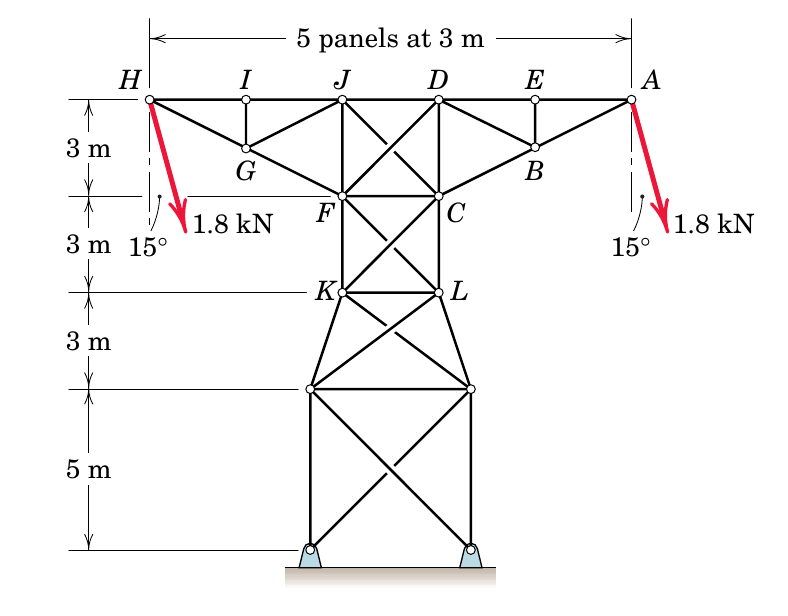


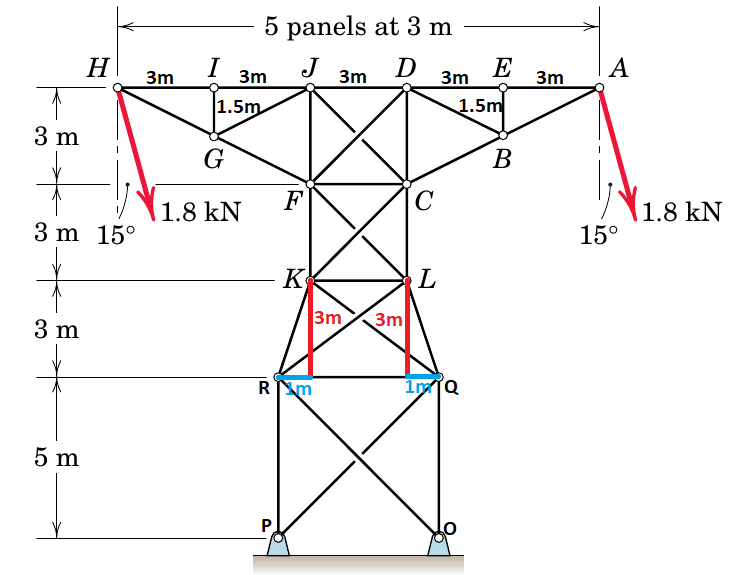

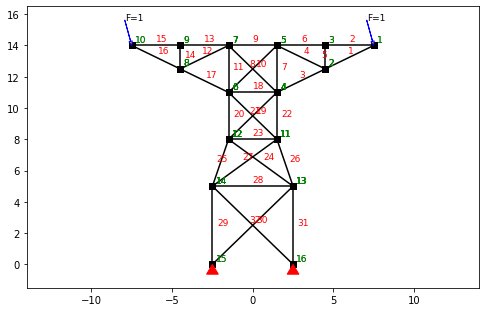

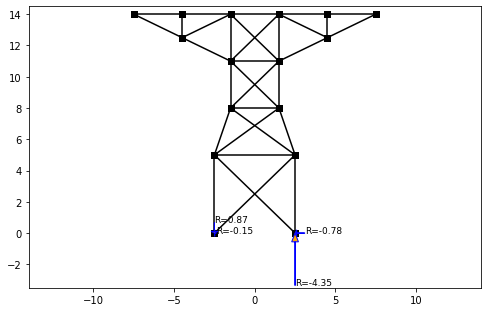

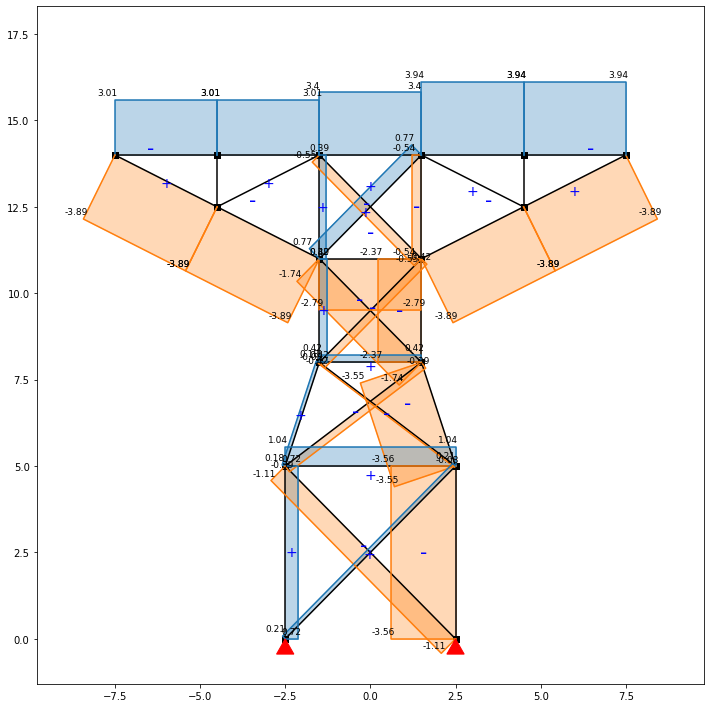

In [ ]:
# Inicializa a biblioteca SystemElements()
ss = SystemElements()

# Define e posiciona os nós da estrutura
node={"O":(2.5,0), "P":(-2.5,0), "Q":(2.5,5), "R":(-2.5,5),
      "A":(7.5,14), "B":(4.5,12.5), "C":(1.5,11), "D":(1.5,14), "E":(4.5,14),
      "F":(-1.5,11), "G":(-4.5,12.5), "H":(-7.5,14), "I":(-4.5,14), "J":(-1.5,14), 
      "K":(-1.5,8), "L":(1.5,8)}

# Define as conectividades/membros entre os nós
conec=[('A', 'B'), ('A', 'E'),
       ('B', 'C'), ('B', 'D'), ('B', 'E'),
       ('E', 'D'), 
       ('D', 'C'), ('D', 'F'), ('D', 'J'),
       ('J', 'C'), ('J', 'F'), ('J', 'G'), ('J', 'I'),
       ('I', 'G'), ('I', 'H'),
       ('G', 'H'), ('G', 'F'),
       ('F', 'C'), ('F', 'L'), ('F', 'K'),
       ('C', 'K'), ('C', 'L'),
       ('K', 'L'), ('K', 'Q'), ('K', 'R'),
       ('L', 'Q'), ('L', 'R'),
       ('R', 'Q'), ('R', 'P'), ('R', 'O'),
       ('Q', 'O'), ('Q', 'P')]

# Implementa a conectividade entre os nós gerando os elementos ou "membros"
for e in conec:
  element = (node[e[0]], node[e[1]])
  ss.add_truss_element(location = element)    # Add um elemento treliça entre cada nó conectado

# Define os apoios
n1 = ss.find_node_id(node['O'])
n2 = ss.find_node_id(node['P'])
ss.add_support_hinged(node_id=n1)         # Add um apoio articulado ao nó "O" da estrutura
ss.add_support_hinged(node_id=n2)         # Add um apoio articulado ao nó "P" da estrutura

# Define os carregamentos
F= -1.8
node_A = ss.find_node_id(node['A'])
node_H = ss.find_node_id(node['H'])
ss.point_load(node_id=node_A, Fy=F, rotation=-15) # Add um carregamento ao nó "A" da estrutura
ss.point_load(node_id=node_H, Fy=F, rotation=-15) # Add um carregamento ao nó "H" da estrutura


# "Resolve" a estrutura encontrando todas as forças aplicadas sobre ela
ss.solve()


# Grafico da estrutura rotulada e representada computacionalmente
ss.show_structure(scale=1, figsize=(7, 4.5), offset=(0, -8))
# Gráfico das forças de reação
ss.show_reaction_force(scale=1, figsize=(7, 4.5), offset=(0, -6))
# Gráfico da força axial (compressão e tração)
ss.show_axial_force(scale=0.7, figsize=(10, 10), offset=(0, -9))

# Problema 2 (20 pontos)


Determine as forças em cada um dos membros da treliça abaixo. 
Enumere os nós e identifique os elementos.
Apresente os resultados indicando se a força é de tração ou compressão.
A altura dos pontos $A$ e $B$ é de 4 metros.


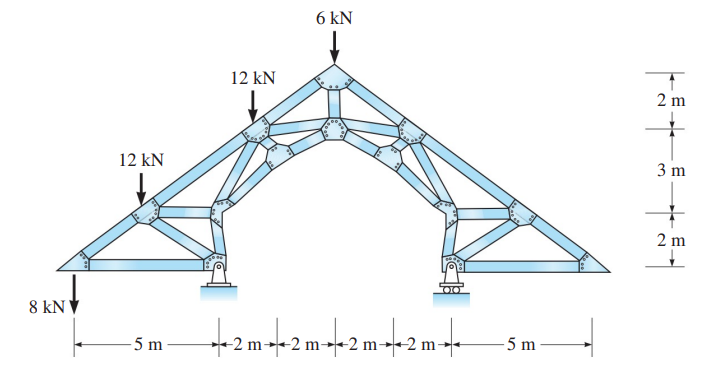


Esboço do problema:

Para encontrar as coordenadas em x dos pontos C e E, utilizamos a semelhança de triângulos (caso LLL) como mostrado abaixo:

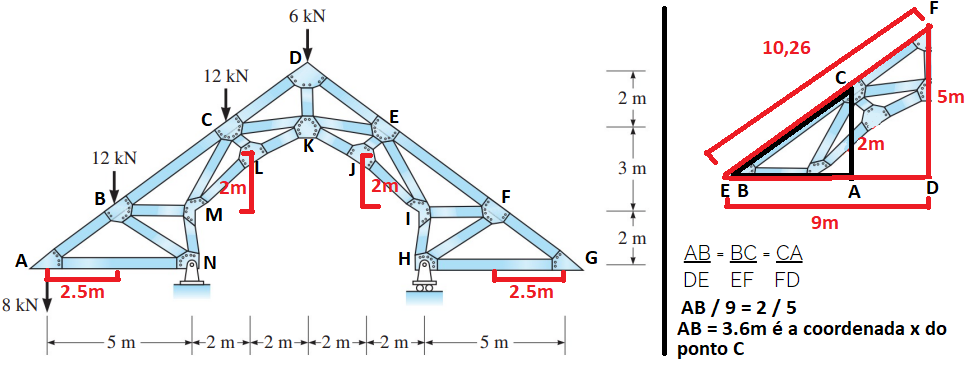

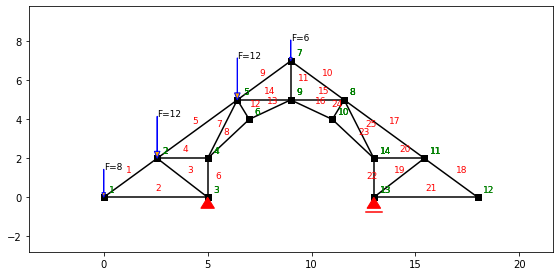

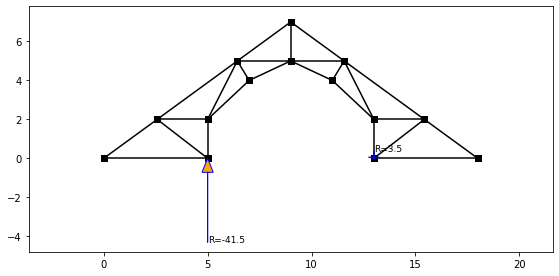

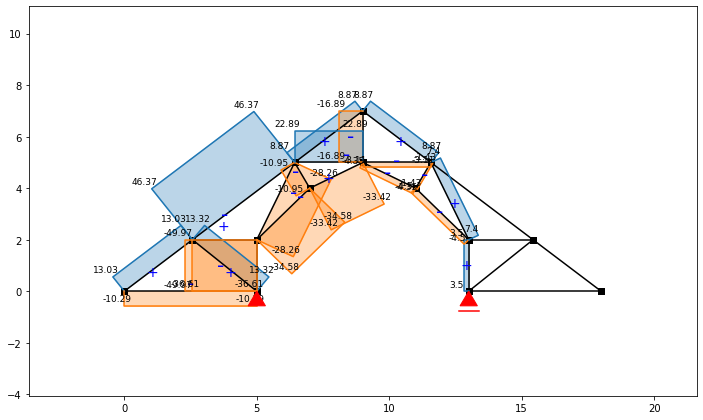

In [ ]:
# Inicializa a biblioteca SystemElements()
ss = SystemElements()

# Define e posiciona os nós da estrutura
node={"A":(0,0), "B":(2.5714,2), "C":(6.4286,5), "D":(9,7), "E":(11.5714,5), "F":(15.4286,2), "G":(18,0), 
      "H":(13,0), "I":(13,2), "J":(11,4), "K":(9,5), "L":(7,4), "M":(5,2), "N":(5,0)}

# Define as conectividades/membros entre os nós
conec=[('A', 'B'), ('A', 'N'),
       ('B', 'N'), ('B', 'M'), ('B', 'C'),
       ('M', 'N'), ('M', 'C'), ('M', 'L'),
       ('D', 'C'), ('D', 'E'), ('D', 'K'),
       ('L', 'C'), ('L', 'K'),
       ('K', 'C'), ('K', 'E'), ('K', 'J'),
       ('F', 'E'), ('F', 'G'), ('F', 'H'), ('F', 'I'),
       ('H', 'G'), ('H', 'I'),
       ('J', 'I'), ('J', 'E'),
       ('E', 'I')]

# Implementa a conectividade entre os nós gerando os elementos ou "membros"
for e in conec:
  element = (node[e[0]], node[e[1]])
  ss.add_truss_element(location = element)  # Add um elemento treliça entre cada nó conectado

# Define os apoios
n1 = ss.find_node_id(node['N'])
n2 = ss.find_node_id(node['H'])
ss.add_support_hinged(node_id=n1)   # Add um apoio articulado ao nó "N" da estrutura
ss.add_support_roll(node_id=n2)     # Add um apoio de rolamento ao nó "H" da estrutura

# Define os carregamentos
node_A = ss.find_node_id(node['A'])
node_B = ss.find_node_id(node['B'])
node_C = ss.find_node_id(node['C'])
node_D = ss.find_node_id(node['D'])
ss.point_load(node_id=node_A, Fy=-8)    # Add um carregamento ao nó "A" da estrutura
ss.point_load(node_id=node_B, Fy=-12)   # Add um carregamento ao nó "B" da estrutura
ss.point_load(node_id=node_C, Fy=-12)   # Add um carregamento ao nó "C" da estrutura
ss.point_load(node_id=node_D, Fy=-6)    # Add um carregamento ao nó "D" da estrutura


# "Resolve" a estrutura encontrando todas as forças aplicadas sobre ela
ss.solve()


# Grafico da estrutura rotulada e representada computacionalmente
ss.show_structure(scale=0.7, figsize=(8,4), offset=(0,0))
# Gráfico das forças de reação
ss.show_reaction_force(scale=0.7, figsize=(8,4), offset=(0,2))
# Gráfico da força axial (compressão e tensão)
ss.show_axial_force(scale=0.7, figsize=(10,6), offset=(0,0))

# Problema 3 (30 pontos)

Sabendo que a força máxima de de tração ou compressão nos membros é de 30 kN, determine o maior valor  da carga P  pode assumir para ser aplicada  nos nós  A e B.

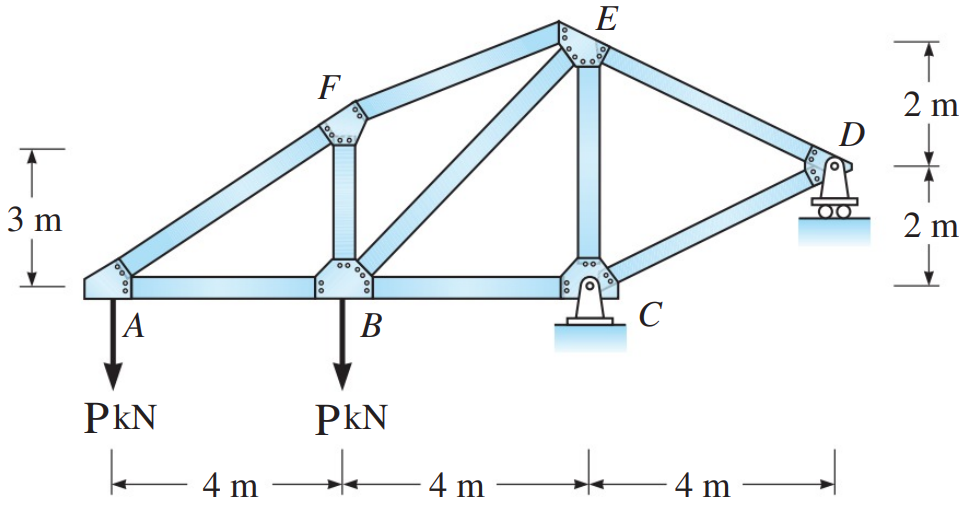

O maior valor que a carga P pode assumir para ser aplicada nos nós A e B é 8.570999999999684


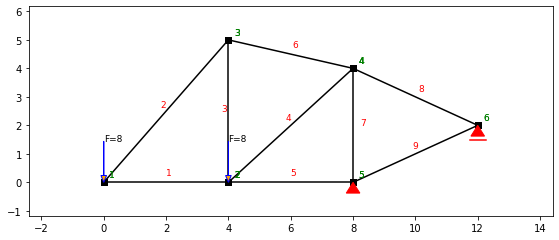

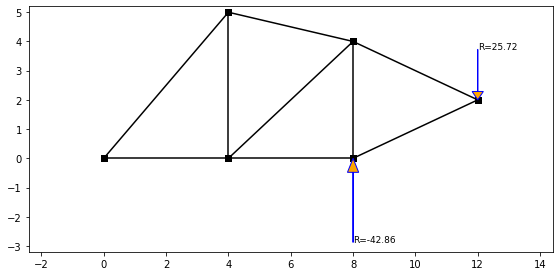

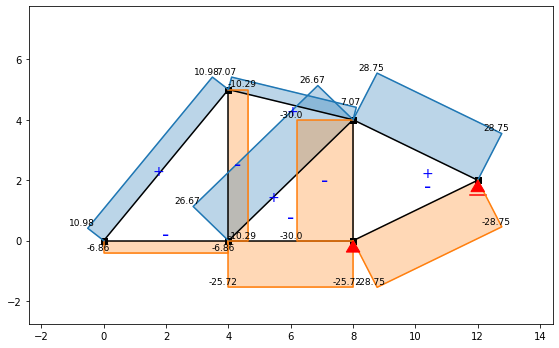

In [ ]:
def calculaP(P):
    # Inicializa a biblioteca SystemElements()
    ss = SystemElements()

    # Define e posiciona os nós da estrutura
    node={"A":(0,0), "B":(4,0), "C":(8,0), "D":(12,2), "E":(8,4), "F":(4,5)}

    # Define as conectividades/membros entre os nós
    conec=[('A', 'B'), ('A', 'F'), 
          ('B', 'F'), ('B', 'E'),  ('B', 'C'),
          ('E', 'F'), ('E', 'C'),  ('E', 'D'),
          ('C', 'D')]

    # Implementa a conectividade entre os nós gerando os elementos ou "membros"
    for e in conec:
      element = (node[e[0]], node[e[1]])
      ss.add_truss_element(location = element)  # Add um elemento treliça entre cada nó conectado

    # Define os apoios
    n1 = ss.find_node_id(node['C'])
    n2 = ss.find_node_id(node['D'])
    ss.add_support_hinged(node_id=n1)   # Add um apoio articulado ao nó "C" da estrutura
    ss.add_support_roll(node_id=n2)     # Add um apoio de rolamento ao nó "D" da estrutura

    # Define os carregamentos
    node_A = ss.find_node_id(node['A'])
    node_B = ss.find_node_id(node['B'])
    ss.point_load(node_id=node_A, Fy=-P)     # Add um carregamento ao nó "A" da estrutura
    ss.point_load(node_id=node_B, Fy=-P)     # Add um carregamento ao nó "B" da estrutura

    # "Resolve" a estrutura encontrando todas as forças aplicadas sobre ela
    ss.solve()

    # Calcula a compressão/tração máxima que o membro está "sofrendo"
    tracaoMax = ss.get_element_results(element_id=0, verbose=False)[6]['N'] # O valor 6 é referente ao 6° membro (entre os nós CE) rotulado como 7 na figura abaixo
    return tracaoMax, ss


# A partir de testes, percebemos que a força de contração/tração máxima (30kn) está no intervalo de P = (8 a 9)KN
# Como forma de conseguir um resultado bem preciso, iremos definir o intervalo entre esses dois números incrementando-os em 0.001 a cada iteração
incremento = 0.001
intervalo = np.arange(8.0, 9.0, incremento)
PMax = 0
ss = ()

for i in intervalo:   # Esse laço será executado até encontrar o ultimo valor de P que gera uma compressão/tração de no máximo 30kn na estrutura
  tracaoMax, ss = calculaP(i)
  if np.abs(tracaoMax) <= 30:
    PMax = i
  if np.abs(tracaoMax) > 30:
    break

print("O maior valor que a carga P pode assumir para ser aplicada nos nós A e B é", PMax)


# Resultados:
# OBS: Esses resultados foram montados considerando o PMax=8.570999999999684 encontrado anteriormente

# Grafico da estrutura rotulada e representada computacionalmente
ss.show_structure(scale=0.7, figsize=(8,3.5), offset=(0,0))
# Gráfico das forças de reação
ss.show_reaction_force(scale=0.7, figsize=(8,4), offset=(0,1.5))
# Gráfico da força axial (compressão e tensão)
ss.show_axial_force(scale=0.7, figsize=(8,5), offset=(0,0))

# Problema 4 (30 pontos)

Considere a treliça abaixo. Desenvolva o modelo estrutural considerando que em cada nó do topo da estrutura (nós 1,2,3,4 e 5) está aplicada uma carga vertical para baixo de 1 kN. 

Observe que a estrutura possui uma lei de formação para a posição dos nós e para a conectividade dos elementos. Essa lei de formação pode ser útil no processo de desenvolvimento do modelo estrutural.



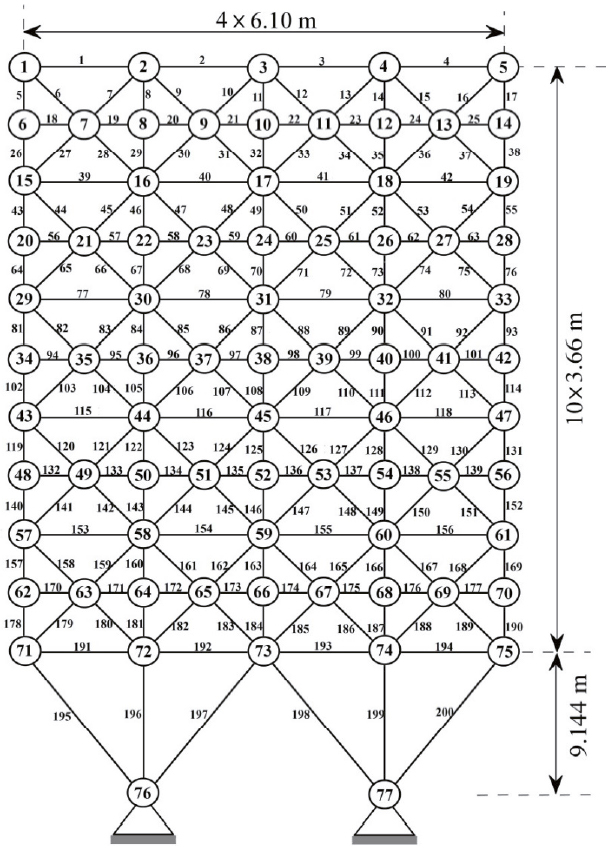

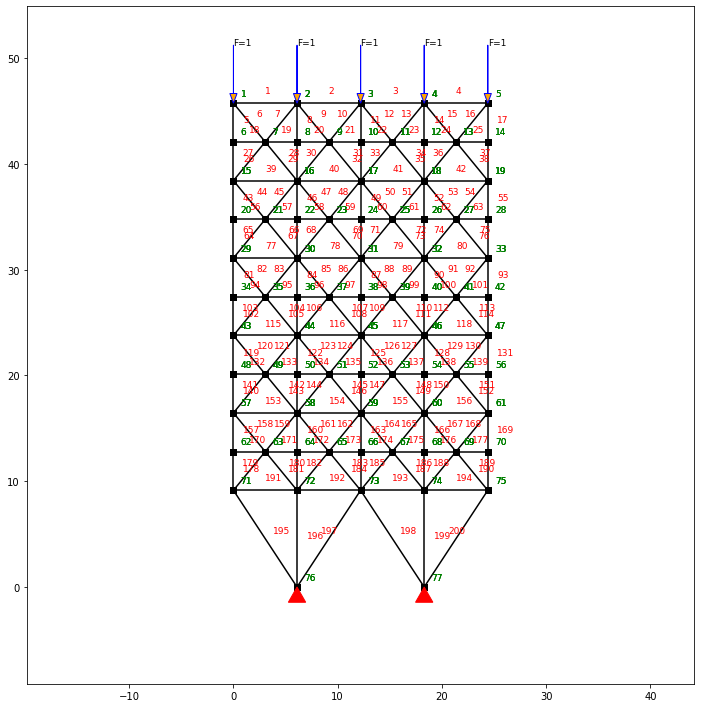

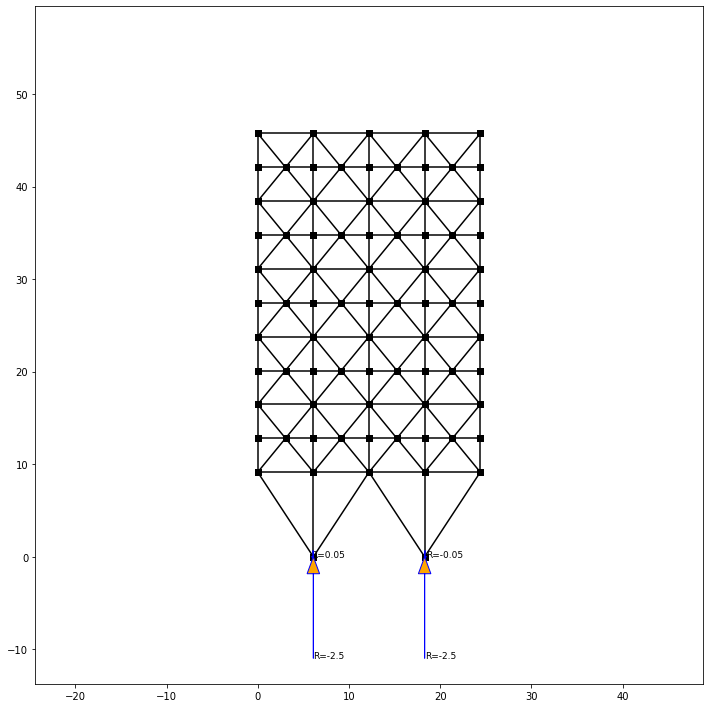

In [ ]:
# Inicializa a biblioteca SystemElements()
ss = SystemElements()

# Define variáveis que serão necessárias para o laço que forma a estrutura. Os valores foram definidos com base na figura
saltoHorizontal = 6.10 # Para o primeiro padrão de formação das "linhas", a distância entre os nós é de 6.10m
saltoHorizontal2 = 6.10/2 # Para o segundo padrão de formação das "linhas", a distância entre os nós é de 3.05m
saltoVert = 3.66 # A distância vertical entre os nós (exceto os nós 76 e 77) é de 3.66m

# Optamos por desenvolver a estrutura do topo para a base, ou seja, começamos pelo nó A e o mesmo está na coordenada 0 em X e 45.744 em Y
coordX = 0 
coordY = 45.744

# Define a lista de elementos
elements = []

'''
Define as listas necessárias para o laço através da função arange do numpy. Dessa forma, podemos alterar os parâmetros da função caso seja necessário aumentar 
a estrutura horizontalmente ou verticalmente. No caso, estamos fazendo 11 "saltos verticais" a partir do nó 1. As listas "linhasTipo1" e "linhasTipo2" são relativas
aos dois padrões de fomação das "linhas". Para "linhasTipo1", o laço se repete 4 vezes (pois temos 4 elementos na linha) e para "linhasTipo2", o laço se repete 
8 vezes (pois temos 8 elementos nesse tipo de linha).
'''
linhas = np.arange(0, 11, 1)
linhasTipo1 = np.arange(0,3,1)
linhasTipo2 = np.arange(0,7,1)

# Laço responsável por fazer o processo de definição das conectividades entre os nós
for linha in linhas:
  # Se linha é par, então precisamos definir as conectividade de acordo com o primeiro padrão de linha
  if linha%2==0:
    
    # Se é a linha 0, ou seja, os primeiros cinco nós da estrutura, então não é necessário conectar os nós verticalmente e diagonalmente
    if linha!=0:
      # Início do trecho que conecta os nós verticalmente e diagonalmente de acordo com o primeiro padrão de linha
      elements.append([ [coordX,coordY+saltoVert], [coordX,coordY] ]) # Primeira conexão vertical da linha
      # Novo laço para fazer 3 conexões, sendo duas diagonais e uma vertical
      for i in range(4):
        elements.append([ [coordX,coordY], [coordX+saltoHorizontal2,coordY+saltoVert] ])
        coordX = coordX+saltoHorizontal
        elements.append([ [coordX,coordY], [coordX-saltoHorizontal2,coordY+saltoVert] ])
        elements.append([ [coordX,coordY], [coordX,coordY+saltoVert] ])
      coordX = 0 # Redefine o valor de CoordX para 0, pois esta variável será necessária para conectar os nós horizontalmente no próximo passo
      # Fim do trecho que conecta os nós verticalmente e diagonalmente

    #Conecta os nós com uma distância maior
    elements.append([ [coordX,coordY], [coordX+saltoHorizontal,coordY] ])
    # Laço para fazer as 4 conexões do primeiro padrão de linha
    for coluna in linhasTipo1:
      coordX = coordX+saltoHorizontal
      elements.append([ [coordX,coordY], [coordX+saltoHorizontal,coordY] ])

  # Se linha é ímpar, então precisamos definir as conectividade de acordo com o segundo padrão de linha
  else:
    # Início do trecho que conecta os nós verticalmente e diagonalmente
    elements.append([ [coordX,coordY+saltoVert], [coordX,coordY] ]) # Primeira conexão vertical da linha
    # Novo laço para fazer 3 conexões, sendo duas diagonais e uma vertical
    for i in range(4):
      elements.append([ [coordX,coordY+saltoVert], [coordX+saltoHorizontal2,coordY] ])
      coordX = coordX+saltoHorizontal
      elements.append([ [coordX,coordY+saltoVert], [coordX-saltoHorizontal2,coordY] ])
      elements.append([ [coordX,coordY+saltoVert], [coordX,coordY] ])
    coordX = 0 # Redefine o valor de CoordX para 0, pois esta variável será necessária para conectar os nós horizontalmente no próximo passo
    # Fim do trecho que conecta os nós verticalmente e diagonalmente

    #Conecta os nós com uma distância menor
    elements.append([ [coordX,coordY], [coordX+saltoHorizontal2,coordY] ])
    # Laço para fazer as 8 conexões do primeiro padrão de linha
    for coluna in linhasTipo2:
      coordX = coordX+saltoHorizontal2
      elements.append([ [coordX,coordY], [coordX+saltoHorizontal2,coordY] ])
  coordY = coordY - saltoVert # Ao final da criação de cada linha, é necessário saltar no sentido negativo de Y, pois começamos a desenvolver a estrutura partindo do topo 
  coordX = 0 # Redefine o valor de CoordX para 0, pois esta variável será necessária enquanto as iterações do for não terminarem

#Adiciona os nós da base e suas conectividades 
coordY = coordY+saltoVert # Ajuste na coordenada Y, pois na última iteração do for acima, houve um salto no sentido negativo de Y que não deixaria a altura da base incorreta
# 9.144m é a distância vertical entre os nós 76 e 77 e o restante da estrutura
elements.append([ [coordX,coordY], [saltoHorizontal,coordY-9.144] ])
elements.append([ [saltoHorizontal,coordY], [saltoHorizontal,coordY-9.144] ])
elements.append([ [saltoHorizontal*2,coordY], [saltoHorizontal,coordY-9.144] ])

elements.append([ [saltoHorizontal*2,coordY], [saltoHorizontal*3,coordY-9.144] ])
elements.append([ [saltoHorizontal*3,coordY], [saltoHorizontal*3,coordY-9.144] ])
elements.append([ [saltoHorizontal*4,coordY], [saltoHorizontal*3,coordY-9.144] ])

# As conectividades geram os elementos
for e in elements:
  ss.add_truss_element(location = e)

# Define os apoios
n1 = ss.find_node_id([saltoHorizontal,coordY-9.144])
n2 = ss.find_node_id([saltoHorizontal*3,coordY-9.144])
ss.add_support_hinged(node_id=n1) # Primeiro apoio articulado
ss.add_support_hinged(node_id=n2) # Segundo apoio articulado

# Define os carregamentos para cada nó do topo da estrutura (nós 1,2,3,4 e 5)
carga = 1 #kN

# 45.744m é a altura da estrutura, ou seja, a coordenada Y do dos nós do topo (nós 1,2,3,4 e 5)
node_1 = ss.find_node_id([0,45.744])
node_2 = ss.find_node_id([saltoHorizontal,45.744])
node_3 = ss.find_node_id([saltoHorizontal*2,45.744])
node_4 = ss.find_node_id([saltoHorizontal*3,45.744])
node_5 = ss.find_node_id([saltoHorizontal*4,45.744])
ss.point_load(node_id=node_1, Fy=-carga)
ss.point_load(node_id=node_2, Fy=-carga)
ss.point_load(node_id=node_3, Fy=-carga)
ss.point_load(node_id=node_4, Fy=-carga)
ss.point_load(node_id=node_5, Fy=-carga)

# "Resolve" a estrutura encontrando todas as forças aplicadas sobre ela
ss.solve()

# Grafico da estrutura rotulada e representada computacionalmente
ss.show_structure(scale=0.7, figsize=(10,10),offset=(0,0))

# Gráfico das forças de reação
ss.show_reaction_force(scale=0.8, figsize=(10,10),offset=(0,0))